In [1]:
import yaml
import os 
import pandas as pd
import sounddevice as sd
import soundfile as sf
import librosa
from IPython.display import clear_output, Audio
import matplotlib.pyplot as plt

<b>Config and inputs:

In [2]:
with open('../XX Data/config.yaml', 'r') as file:
    inputs = yaml.safe_load(file)

phoneme_files = [file for file in os.listdir(inputs['phoneme_files'])]
wav_files = [file for file in os.listdir(inputs['wav_files'])]
word_files = [file for file in os.listdir(inputs['word_files'])]
    
# Ingestion functions
def ingest_phonemes(inputs, file):
    phonemes = pd.read_csv(f"{inputs['phoneme_files']}/{file}", sep=" ", header=None)
    phonemes.columns = ['start_t', 'end_t', 'phoneme']
    
    # Drop start and end markers 
    phonemes = phonemes[phonemes['phoneme'] != 'h#']
    phonemes = phonemes.reset_index().drop('index', axis=1)
    
    return phonemes

def ingest_audio(inputs, file):
    y, sr = librosa.load(f"{inputs['wav_files']}/{file}")
    
    return y, sr

def ingest_words(inputs, file):
    words = pd.read_csv(f"{inputs['phoneme_files']}/{file}", sep=" ", header=None)
    
    return words

<b>Test ingestion:

In [3]:
test_phonemes = ingest_phonemes(inputs, phoneme_files[0])
data, sr = ingest_audio(inputs, wav_files[0])

for id_, phoneme in test_phonemes.iterrows():
    print(id_)
    print(phoneme['phoneme'])
    
    start = phoneme['start_t']
    end = phoneme['end_t']
    sound = data[start:end]
    
    sd.play(sound, sr)
    
    status = sd.wait() 
    clear_output(wait=True)

37
er


## Data Summary

<b>Calculations:

In [4]:
# Calc number of responses per participant ID
list_of_files = [file.split("_")[0] for file in phoneme_files]
my_dict = {i:list_of_files.count(i) for i in list_of_files}

max_ = 1
for i in my_dict.keys():
    if my_dict[i] > max_:
        max_ = my_dict[i]

In [5]:
# Calc number of phonemes and phoneme pairs
phonemes = [ingest_phonemes(inputs, file)['phoneme'] for file in phoneme_files]

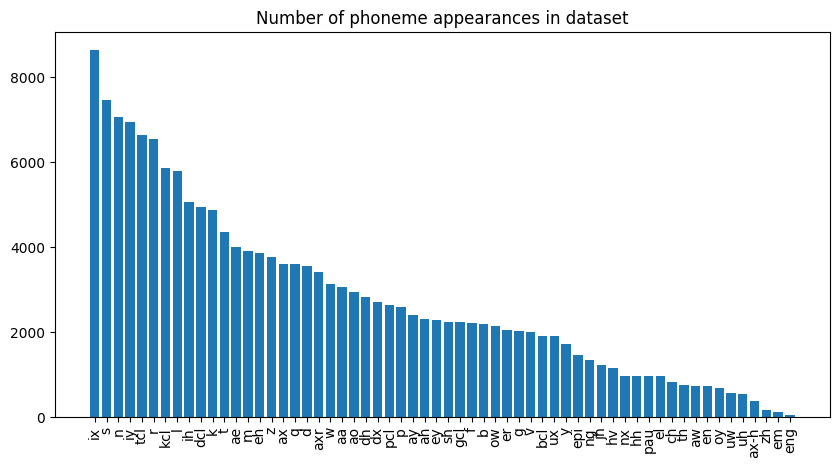

In [7]:
# Simple phonemes 
counts = {}
for sample in phonemes:
    for phoneme in sample:
        if phoneme in counts:
            counts[phoneme] = counts[phoneme] + 1
        else:
            counts[phoneme] = 1
counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax.bar([item[0] for item in counts], [item[1] for item in counts])
plt.xticks(rotation = 90)
 
# Setting title
plt.title('Number of phoneme appearances in dataset')
 
# Show plot
plt.show()

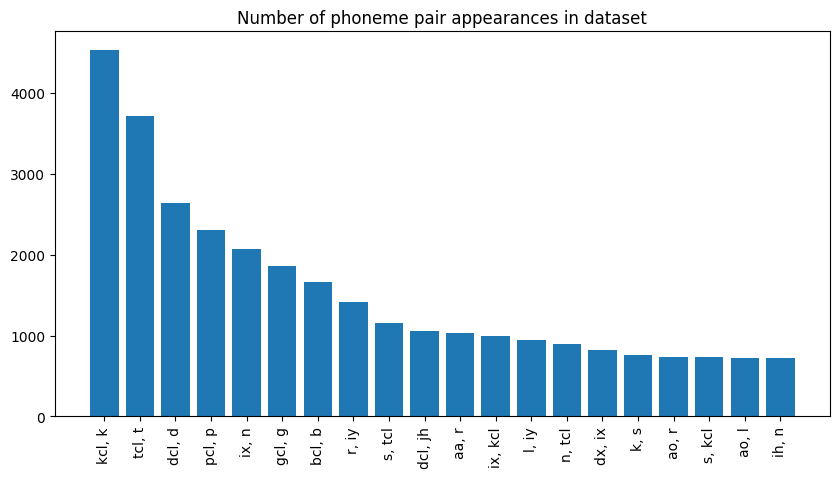

In [18]:
# Phoneme pairs
pair_counts = {}
for sample in phonemes:
    for i in range(0, len(sample)-1):
        pair = f'{sample[i]}, {sample[i+1]}'
        if pair in pair_counts:
            pair_counts[pair] = pair_counts[pair] + 1
        else:
            pair_counts[pair] = 1
pair_counts = sorted(pair_counts.items(), key=lambda item: item[1], reverse=True)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax.bar([item[0] for item in pair_counts[0:20]], [item[1] for item in pair_counts[0:20]])
plt.xticks(rotation = 90)
 
# Setting title
plt.title('Number of phoneme pair appearances in dataset')
 
# Show plot
plt.show()

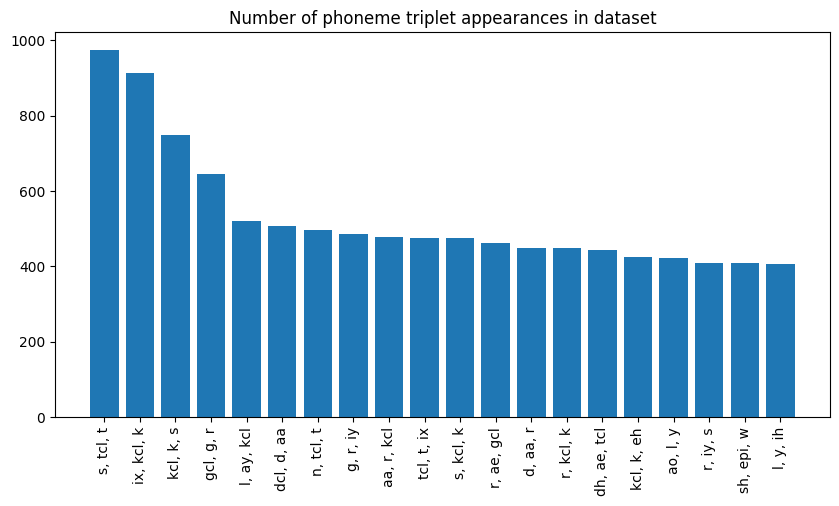

In [16]:
# Phoneme triplets
triplet_counts = {}
for sample in phonemes:
    for i in range(0, len(sample)-2):
        triplet = f'{sample[i]}, {sample[i+1]}, {sample[i+2]}'
        if triplet in triplet_counts:
            triplet_counts[triplet] = triplet_counts[triplet] + 1
        else:
            triplet_counts[triplet] = 1
triplet_counts = sorted(triplet_counts.items(), key=lambda item: item[1], reverse=True)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax.bar([item[0] for item in triplet_counts[0:20]], [item[1] for item in triplet_counts[0:20]])
plt.xticks(rotation = 90)
 
# Setting title
plt.title('Number of phoneme triplet appearances in dataset')
 
# Show plot
plt.show()

In [17]:
# Data summary
print(f'Total number of recordings: {len(wav_files)}')
print(f'Number of unique people: {len(set([file.split("_")[0] for file in phoneme_files]))}')
print(f'Number of audio samples per person: {max_}')
print(f'Number of unique phrases: {len(set([file.split("_")[1] for file in phoneme_files]))}')

# Phoneme summary
print()
print(f'N unique phonemes: {len(counts)}')
print(f'N unique phoneme pairs: {len(pair_counts)}')
print(f'N unique phoneme triplets: {len(triplet_counts)}')

Total number of recordings: 4620
Number of unique people: 462
Number of audio samples per person: 10
Number of unique phrases: 1718

N unique phonemes: 60
N unique phoneme pairs: 2374
N unique phoneme triplets: 20546


# Autoencoder: Anomaly Detection at Sentence Level

In [ ]:
# Ingest test case - Google Colab 

In [2]:
print(f'Length of sampled audio file: {len(data)}')
print(f'Sample rate: {samplerate}')
duration = len(data)/samplerate
print(f'Duration of audio file: {duration} seconds')

Length of sampled audio file: 46797
Sample rate: 16000
Duration of audio file: 2.9248125 seconds


In [ ]:
# Plot phoneme pairs - number of phonemes etc 